In [2]:
%load_ext autoreload
%autoreload 2

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [6]:
import sys
sys.path.append("../../../") 

from utils.paths import make_dir_line

modality = 'c'
project = 'Streamlined Data Ingestion with pandas'
data = make_dir_line(modality, project)

raw = data('raw')

# 14.1.0 Importing Data from Flat Files

## 14.1.2 Get data from CSVs

In [7]:
# Import pandas as pd
# import pandas as pd

# Read the CSV and assign it to the variable data
data = pd.read_csv(raw / 'vt_tax_data_2016.csv')

# View the first few lines of data
print(data.head())

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  NUMDEP  TOTAL_VITA  VITA   TCE  VITA_EIC   RAL    RAC  ELDERLY  \
0  130630   26200        5900  2140  3760       860  1440  12620    30760   
1  132950   32310        1670   840   830        30   680  13670    19160   
2   91870   23610         170     0   170         0     0   4550    14920   
3   71610   18860           0     0     0         0     0   1880    10270   
4  103710   30330           0     0     0         0     0    930    13600   

    A00100  N02650   A02650  N00200   A00200  N00300  A00300  N00600  A006

## 14.1.3 Get data from other flat files

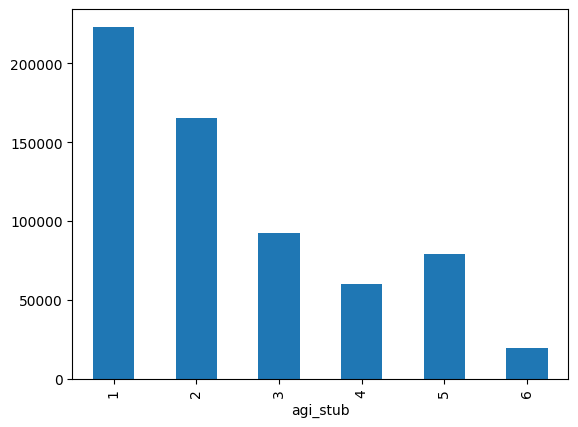

In [13]:
# Import pandas with the alias pd
# import pandas as pd

# Load TSV using the sep keyword argument to set delimiter
data = pd.read_csv(raw / "vt_tax_data_2016.tsv", sep="\t")

# Plot the total number of tax returns by income group
counts = data.groupby("agi_stub").N1.sum()
counts.plot.bar()
plt.show()

## 14.1.5 Import a subset of columns

In [16]:
# Create list of columns to use
cols = ["zipcode", "agi_stub", "mars1", "MARS2", "NUMDEP"]

# Create data frame from csv using only selected columns
data = pd.read_csv(raw / "vt_tax_data_2016.csv", usecols=cols)

# View counts of dependents and tax returns by income level
print(data.groupby("agi_stub").sum())

          zipcode   mars1  MARS2  NUMDEP
agi_stub                                
1         1439444  170320  28480   52490
2         1439444  104000  37690   64660
3         1439444   39160  45390   47330
4         1439444   11670  44410   37760
5         1439444    7820  67750   60730
6         1439444    1210  16340   16300


## 14.1.6 Import a file in chunks

In [19]:
vt_data_first500 = pd.read_csv(raw / "vt_tax_data_2016.csv", 
                                nrows=500)
vt_data_first500.tail()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAL,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01400,A01400,N01700,A01700,SCHF,N02300,A02300,N02500,A02500,N26270,A26270,N02900,A02900,N03220,A03220,N03300,A03300,N03270,A03270,N03150,A03150,N03210,A03210,N03230,A03230,N03240,A03240,N04470,A04470,A00101,N17000,A17000,N18425,A18425,N18450,A18450,N18500,A18500,N18800,A18800,N18300,A18300,N19300,A19300,N19500,A19500,N19530,A19530,N19550,A19550,N19570,A19570,N19700,A19700,N20800,A20800,n21020,a21020,N04800,A04800,N05800,A05800,N09600,A09600,N05780,A05780,N07100,A07100,N07300,A07300,N07180,A07180,N07230,A07230,N07240,A07240,N07220,A07220,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N09750,A09750,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
495,50,VT,5355,4,30,0,30,0,20,90,20,0,0,0,0,0,0,0,3684,30,3684,30,2349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,2664,30,421,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,536,0,0,0,0,0,0,0,0,0,0,30,455,30,492,0,0,0,0,0,0,0,0
496,50,VT,5355,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
497,50,VT,5355,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,50,VT,5356,1,350,290,40,40,120,410,60,0,0,0,0,0,50,60,3630,350,3735,290,2744,60,11,40,82,40,54,20,10,60,396,30,18,0,0,40,413,0,40,102,0,0,0,0,70,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,369,310,0,0,0,0,0,0,0,0,0,0,20,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,783,130,81,0,0,0,0,30,7,0,0,0,0,0,0,0,0,0,0,0,0,60,71,20,103,20,92,0,0,310,614,100,159,70,115,30,31,90,91,30,24,120,74,160,149,0,0,0,0,30,37,290,436
499,50,VT,5356,2,180,120,40,0,90,250,30,0,0,0,0,0,40,40,6223,180,6409,150,4710,40,16,30,102,30,68,0,0,30,353,40,120,50,492,0,0,0,40,107,40,173,30,286,60,186,0,0,0,0,30,103,30,119,40,45,0,0,0,0,40,657,1596,50,330,50,62,0,0,60,223,0,0,40,229,40,260,0,0,0,0,0,0,0,0,50,45,30,181,0,0,170,3557,170,454,0,0,30,34,50,28,0,0,0,0,0,0,40,8,0,0,0,0,40,90,40,134,40,173,20,13,170,641,0,0,0,0,0,0,0,0,0,0,160,426,170,497,0,0,0,0,50,76,130,212


In [20]:
# Create dataframe of next 500 rows with labeled columns
vt_data_next500 = pd.read_csv(raw / "vt_tax_data_2016.csv", 
                       		  nrows=500,
                       		  skiprows=500,
                       		  header=None,
                       		  names=list(vt_data_first500))

# View the Vermont dataframes to confirm they're different
print(vt_data_first500.head())
print(vt_data_next500.head())

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  NUMDEP  TOTAL_VITA  VITA   TCE  VITA_EIC   RAL    RAC  ELDERLY  \
0  130630   26200        5900  2140  3760       860  1440  12620    30760   
1  132950   32310        1670   840   830        30   680  13670    19160   
2   91870   23610         170     0   170         0     0   4550    14920   
3   71610   18860           0     0     0         0     0   1880    10270   
4  103710   30330           0     0     0         0     0    930    13600   

    A00100  N02650   A02650  N00200   A00200  N00300  A00300  N00600  A006

## 14.1.8 Specify data types

In [22]:
# Load csv with no additional arguments
data = pd.read_csv(raw / "vt_tax_data_2016.csv")

# Print the data types
print(data.dtypes)

STATEFIPS      int64
STATE         object
zipcode        int64
agi_stub       int64
N1             int64
mars1          int64
MARS2          int64
MARS4          int64
PREP           int64
N2             int64
NUMDEP         int64
TOTAL_VITA     int64
VITA           int64
TCE            int64
VITA_EIC       int64
RAL            int64
RAC            int64
ELDERLY        int64
A00100         int64
N02650         int64
A02650         int64
N00200         int64
A00200         int64
N00300         int64
A00300         int64
N00600         int64
A00600         int64
N00650         int64
A00650         int64
N00700         int64
A00700         int64
N00900         int64
A00900         int64
N01000         int64
A01000         int64
N01400         int64
A01400         int64
N01700         int64
A01700         int64
SCHF           int64
N02300         int64
A02300         int64
N02500         int64
A02500         int64
N26270         int64
A26270         int64
N02900         int64
A02900       

In [24]:
# Create dict specifying data types for agi_stub and zipcode
data_types = {'agi_stub': 'category',
			  'zipcode': str}

# Load csv using dtype to set correct data types
data = pd.read_csv(raw / "vt_tax_data_2016.csv", dtype=data_types)

# Print data types of resulting frame
print(data.dtypes.head())

STATEFIPS       int64
STATE          object
zipcode        object
agi_stub     category
N1              int64
dtype: object


## 14.1.9 Set custom NA values

In [26]:
# Create dict specifying that 0s in zipcode are NA values
null_values = {"zipcode": 0}

# Load csv using na_values keyword argument
data = pd.read_csv(raw / "vt_tax_data_2016.csv", 
                   na_values=null_values)

# View rows with NA ZIP codes
print(data[data.zipcode.isna()])

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT      NaN         1  111580  85090  14170  10740  45360   
1         50    VT      NaN         2   82760  51960  18820  11310  35600   
2         50    VT      NaN         3   46270  19540  22650   3620  24140   
3         50    VT      NaN         4   30070   5830  22190    960  16060   
4         50    VT      NaN         5   39530   3900  33800    590  22500   
5         50    VT      NaN         6    9620    600   8150      0   7040   

       N2  NUMDEP  TOTAL_VITA  VITA   TCE  VITA_EIC   RAL    RAC  ELDERLY  \
0  130630   26200        5900  2140  3760       860  1440  12620    30760   
1  132950   32310        1670   840   830        30   680  13670    19160   
2   91870   23610         170     0   170         0     0   4550    14920   
3   71610   18860           0     0     0         0     0   1880    10270   
4  103710   30330           0     0     0         0     0    930    13600  

## 14.1.10 Skip bad data

In [37]:
try:
  # Set warn_bad_lines to issue warnings about bad records
  data = pd.read_csv(raw / "vt_tax_data_2016.csv", 
                     on_bad_lines="warn")
  
  # View first 5 records
  print(data.head())
  
except pd.errors.ParserError:
    print("Your data contained rows that could not be parsed.")
    
data.shape

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  NUMDEP  TOTAL_VITA  VITA   TCE  VITA_EIC   RAL    RAC  ELDERLY  \
0  130630   26200        5900  2140  3760       860  1440  12620    30760   
1  132950   32310        1670   840   830        30   680  13670    19160   
2   91870   23610         170     0   170         0     0   4550    14920   
3   71610   18860           0     0     0         0     0   1880    10270   
4  103710   30330           0     0     0         0     0    930    13600   

    A00100  N02650   A02650  N00200   A00200  N00300  A00300  N00600  A006

(1476, 147)

In [ ]:
print('Ok_')

Ok_
